In [2]:
import numpy as np
import math
import copy
from  matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# AM205 - Final Project
## Silin Zou

In [2]:
# initialization
def initial_1d():
    L = 10**6
    N = 200  # grid number in x axis
    
    del_t = 10
    del_s = L/N
    T = 500000
    itr = int(T/del_t)

    f = 0.0001 # Coriolis force
    g = 9.8

    u = np.zeros((N,itr),dtype='float')
    v = np.zeros((N,itr),dtype='float')
    h = np.zeros((N,itr),dtype='float')

    for i in range(N):
        if 100 <i <= 150:
            h[i,0] = 100.1
        else:
            h[i,0] = 100
    H = np.mean(h[:,0],axis=0)
    return H, N, del_t, del_s, itr, f, g, u, v, h

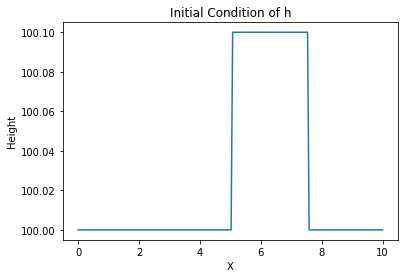

In [4]:
H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h = initial_1d()
plt.plot(np.linspace(0,10,N),h[:,0])
plt.title('Initial Condition of h')
plt.xlabel('X')
plt.ylabel('Height')
plt.savefig('./pictures/initial_h_rec.png')

In [5]:
#guassian
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def initial_guassian_1d():
    L = 10**6
    N = 200  # grid number in x axis
    
    del_t = 10
    del_s = L/N
    T = 500000
    itr = int(T/del_t)

    f = 0.0001 # Coriolis force
    g = 9.8

    u = np.zeros((N,itr),dtype='float')
    v = np.zeros((N,itr),dtype='float')
    h = np.zeros((N,itr),dtype='float')

#     for i in range(N):
#         if 100 <i <= 150:
#             h[i,0] = 100.1
#         else:
#             h[i,0] = 100
    x_values = np.linspace(-3, 3, N)
    y_values = gaussian(x_values, 0, 0.08)*0.1 + 99.9
    for i in range(N):
        h[i,0] = y_values[i]
    H = np.mean(h[:,0],axis=0)
    return H, N, del_t, del_s, itr, f, g, u, v, h

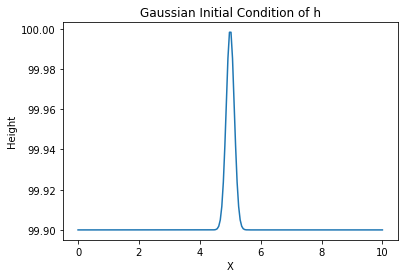

In [21]:
H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h = initial_guassian_1d()
plt.plot(np.linspace(0,10,N),h[:,0])
plt.title('Gaussian Initial Condition of h')
plt.xlabel('X')
plt.ylabel('Height')
plt.savefig('./pictures/initial_h_gauss.png')

In [61]:
def forward_central_scheme(H, N, del_t, del_s, itr, f, g, u_, v_, h_):
    h = copy.deepcopy(h_)
    u = copy.deepcopy(u_)
    v = copy.deepcopy(v_)
    for i in range(1,itr):
        for j in range(N):
            if j == 0:
                h[j,i] = del_t*(-H*(u[j+1,i-1]-u[-1,i-1])/(2*del_s)) + h[j,i-1]
                u[j,i] = del_t*(-g*(h[j+1,i-1]-h[-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
            elif j == N-1:
                h[j,i] = del_t*(-H*(u[0,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-1]
                u[j,i] = del_t*(-g*(h[0,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
            else:
                h[j,i] = del_t*(-H*(u[j+1,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-1]
                u[j,i] = del_t*(-g*(h[j+1,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
    return u,v,h

In [62]:
H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h = initial_guassian_1d()
U,V,H = forward_central_scheme(H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h)

KeyboardInterrupt: 

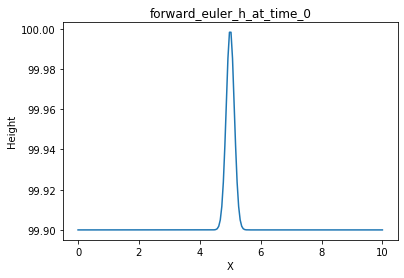

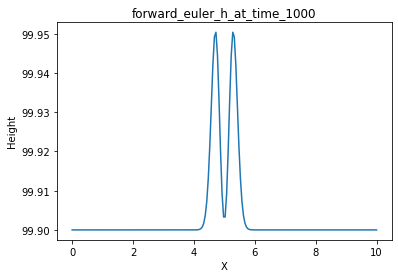

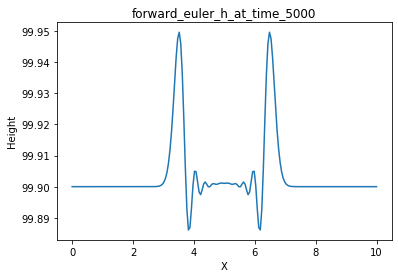

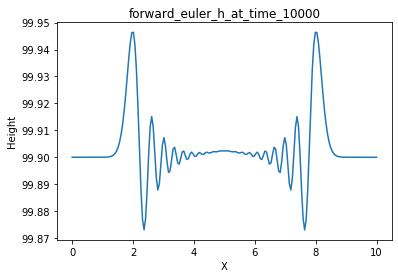

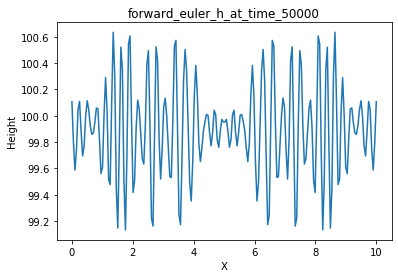

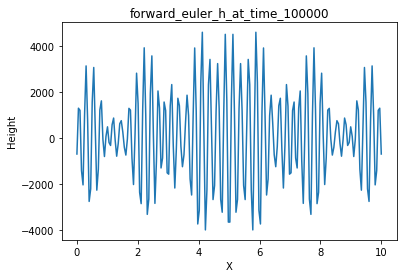

In [39]:
temp = [0, 100, 500, 1000, 5000, 10000]
for i in temp:
    plt.figure()
    plt.plot(np.linspace(0,10,N),H[:,i], c =u'#1f77b4')
    plt.title('forward_euler_h_at_time_{}'.format(i*10))
    plt.xlabel('X')
    plt.ylabel('Height')
    plt.savefig('./pictures/forward_euler_h_at_time_{}.png'.format(i*10))


In [26]:
H.shape

(200, 50000)

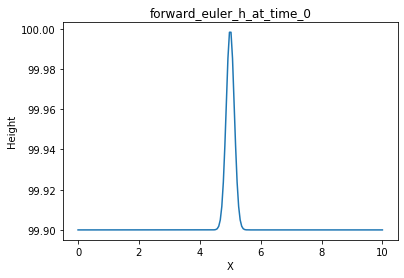

In [44]:
fig, ax = plt.subplots()

x = np.linspace(0,10,N)
line, = ax.plot(x, H[:,0])


def init():  # only required for blitting to give a clean slate.
    line.set_ydata(H[:,0])
    ax.set_title('forward_euler_h_at_time_0')
    ax.set_xlabel('X')
    ax.set_ylabel('Height')
#     ax.set_ylim(99,101)
    return line,


def animate(i):
    line.set_ydata(H[:,i*20])  #  the data.
#     ax.set_ylim((99,101))
    ax.set_title('forward_euler_h_at_time_{}'.format(i*20*10))
    ax.set_xlabel('X')
    ax.set_ylabel('Height')
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = 500, interval=20, blit=False)

HTML(ani.to_html5_video())

In [64]:
def leap_frog_central_scheme(H, N, del_t, del_s, itr, f, g, u_, v_, h_):
    h = copy.deepcopy(h_)
    u = copy.deepcopy(u_)
    v = copy.deepcopy(v_)
    for i in range(1,itr):
        if i == 1 : # forward difference
            for j in range(N):
                if j == 0:
                    h[j,i] = del_t*(-H*(u[j+1,i-1]-u[-1,i-1])/(2*del_s)) + h[j,i-1]
                    u[j,i] = del_t*(-g*(h[j+1,i-1]-h[-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                    v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
                elif j == N-1:
                    h[j,i] = del_t*(-H*(u[0,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-1]
                    u[j,i] = del_t*(-g*(h[0,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                    v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
                else:
                    h[j,i] = del_t*(-H*(u[j+1,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-1]
                    u[j,i] = del_t*(-g*(h[j+1,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-1]
                    v[j,i] = -f*u[j,i-1]*del_t + v[j,i-1]
        else:
            for j in range(N):
                if j == 0: # central difference in time and space, conditionally stable
                    h[j,i] = 2*del_t*(-H*(u[j+1,i-1]-u[-1,i-1])/(2*del_s)) + h[j,i-2]
                    u[j,i] = 2*del_t*(-g*(h[j+1,i-1]-h[-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-2]
                    v[j,i] = -f*u[j,i-1]*del_t*2 + v[j,i-2]
                elif j == N-1:
                    h[j,i] = 2*del_t*(-H*(u[0,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-2]
                    u[j,i] = 2*del_t*(-g*(h[0,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-2]
                    v[j,i] = -f*u[j,i-1]*del_t*2 + v[j,i-2]
                else:
                    h[j,i] = 2*del_t*(-H*(u[j+1,i-1]-u[j-1,i-1])/(2*del_s)) + h[j,i-2]
                    u[j,i] = 2*del_t*(-g*(h[j+1,i-1]-h[j-1,i-1])/(2*del_s) + f*v[j,i-1]) + u[j,i-2]
                    v[j,i] = -f*u[j,i-1]*del_t*2 + v[j,i-2]
#             if i%5 == 0: # smooth
#                 h[:,i-1] = h[:,i-1] + 0.01*(h[:,i]-2*h[:,i-1]+h[:,i-2])
#                 u[:,i-1] = u[:,i-1] + 0.01*(u[:,i]-2*u[:,i-1]+u[:,i-2])
#                 v[:,i-1] = v[:,i-1] + 0.01*(v[:,i]-2*v[:,i-1]+v[:,i-2])
            
    return u,v,h

In [65]:
H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h = initial_guassian_1d()
U,V,H = leap_frog_central_scheme(H, N, del_t, del_s, itr, f, g, u_ini, v_ini, h)

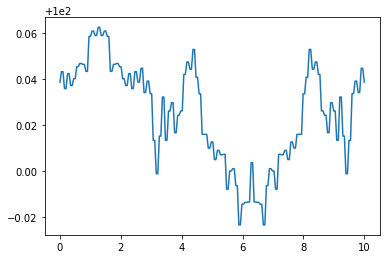

In [53]:
plt.plot(np.linspace(0,10,N),H[:,-1])
    

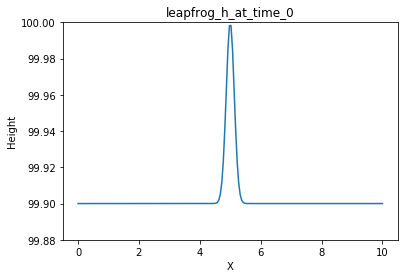

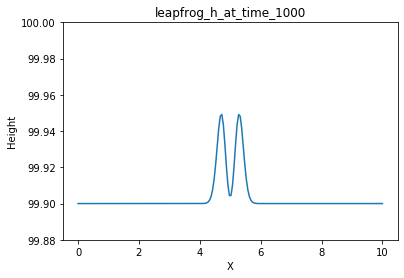

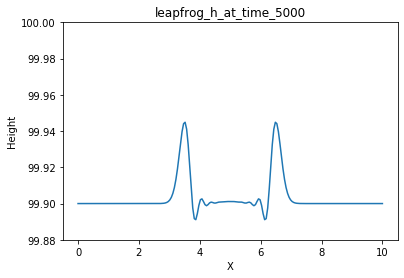

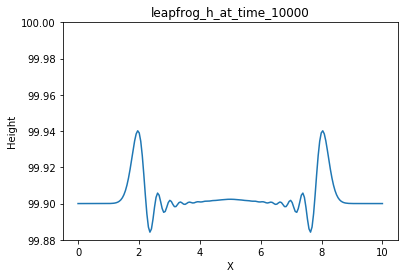

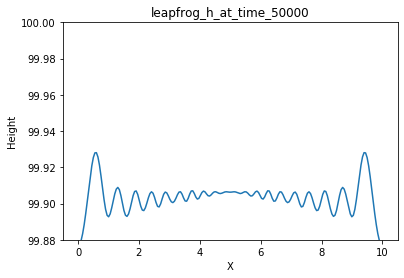

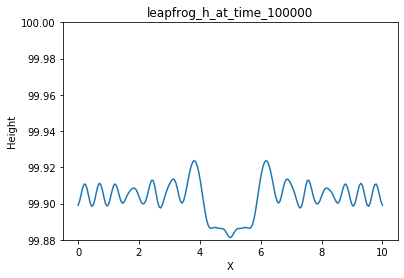

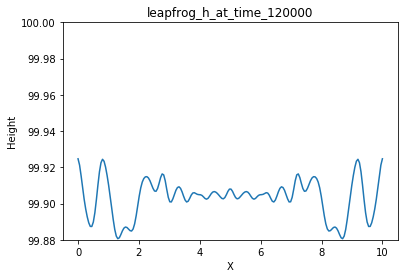

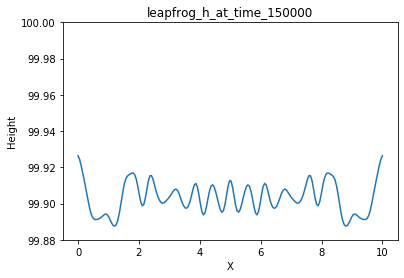

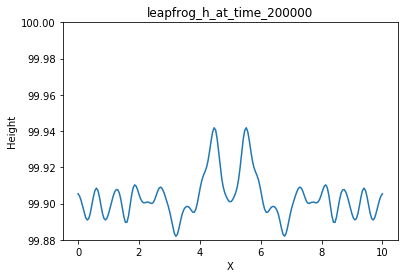

In [67]:
temp = [0, 100, 500, 1000, 5000, 10000, 12000,15000, 20000]
for i in temp:
    plt.figure()
    plt.plot(np.linspace(0,10,N),H[:,i], c =u'#1f77b4')
    plt.title('leapfrog_h_at_time_{}'.format(i*10))
    plt.ylim((99.88,100.0))
    plt.xlabel('X')
    plt.ylabel('Height')
    plt.savefig('./pictures/leapfrog_h_at_time_{}.png'.format(i*10))

In [57]:
H.shape

(200, 50000)

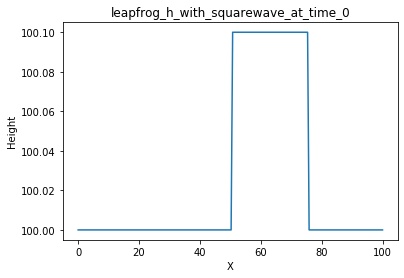

In [59]:

fig, ax = plt.subplots()

x = np.linspace(0,100,N)
line, = ax.plot(x, H[:,0])



def init():  # only required for blitting to give a clean slate.
    line.set_ydata(H[:,0])
#     ax.set_ylim((99.5,100.5))
    ax.set_title('leapfrog_h_with_squarewave_at_time_0')
    ax.set_xlabel('X')
    ax.set_ylabel('Height')
    return line,


def animate(i):
    line.set_ydata(H[:,i*20])  #  the data.
#     ax.set_ylim((99.5,100.5))
    ax.set_title('leapfrog_h_with_squarewave_at_time_{}'.format(i*20*10))
    ax.set_xlabel('X')
    ax.set_ylabel('Height')
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames = 500, interval=30, blit=False)

HTML(ani.to_html5_video())

In [68]:
##################################################
## 2d ################################

In [3]:
# initialization
def initial_2d():
    X = 10**6
    Y = 10**6
    N = 100  # grid number in

    del_t = 50
    del_x = X/N
    del_y = Y/N
    T = 100000

    itr = int(T/del_t)

    f = 0.0001 # Coriolis force
    g = 9.8

    h = np.zeros((N,N,itr),dtype='float')

    h[:,:,0] = 100
    h[70:80,70:80,0] = 100.1
    H = np.mean(h[:,:,0])
    return H, N, del_t, del_x, del_y, itr, f, g, h

In [70]:
# def leap_frog_central_scheme_3d(del_t, del_x,del_y, itr, u_, v_, h_):
#     h = copy.deepcopy(h_)
#     u = copy.deepcopy(u_)
#     v = copy.deepcopy(v_)
#     for t in range(1,itr):
#         if t == 1 : # forward difference
#             for i in range(N):
#                 for j in range(N):
#                     if i == 0 and j != N-1: # boudary condition
#                         h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-1]
#                         u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j,t-1])/(del_y))*del_t + v[i,j,t-1]
#                     elif j == N-1 and i != N-1:
#                         h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-1]
#                         u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j,t-1] - h[i,j-1,t-1])/(del_y))*del_t + v[i,j,t-1]
#                     elif i == N-1 and j !=0:
#                         h[i,j,t] = del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-1]
#                         u[i,j,t] = del_t*(-g*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j,t-1] - h[i,j-1,t-1])/(del_y))*del_t + v[i,j,t-1]
#                     elif j ==0 and i != 0:
#                         h[i,j,t] = del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-1]
#                         u[i,j,t] = del_t*(-g*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j,t-1])/(del_y))*del_t + v[i,j,t-1]
#                     else:
#                         h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-1]
#                         u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t + v[i,j,t-1]
#         else:
#             for i in range(N):
#                 for j in range(N):
#                     if i == 0 and j != N-1: # boudary condition
#                         h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-2]
#                         u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j,t-1])/(del_y))*del_t*2 + v[i,j,t-2]
#                     elif j == N-1 and i != N-1:
#                         h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-2]
#                         u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j,t-1] - h[i,j-1,t-1])/(del_y))*del_t*2 + v[i,j,t-2]
#                     elif i == N-1 and j !=0:
#                         h[i,j,t] = 2*del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-2]
#                         u[i,j,t] = 2*del_t*(-g*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j,t-1] - h[i,j-1,t-1])/(del_y))*del_t*2 + v[i,j,t-2]
#                     elif j ==0 and i != 0:
#                         h[i,j,t] = 2*del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-2]
#                         u[i,j,t] = 2*del_t*(-g*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j,t-1])/(del_y))*del_t*2 + v[i,j,t-2]
#                     else:
#                         h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-2]
#                         u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
#                         v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t*2 + v[i,j,t-2]
#             if t%5 == 0: # smooth
#                 h[:,:,t-1] = h[:,:,t-1] + 0.01*(h[:,:,t]-2*h[:,:,t-1]+h[:,:,t-2])
#                 u[:,:,t-1] = u[:,:,t-1] + 0.01*(u[:,:,t]-2*u[:,:,t-1]+u[:,:,t-2])
#                 v[:,:,t-1] = v[:,:,t-1] + 0.01*(v[:,:,t]-2*v[:,:,t-1]+v[:,:,t-2])
            
#     return u,v,h


In [4]:
def leap_frog_central_scheme_3d_zeroboundary(H, N, del_t, del_x, del_y, itr, f, g, h_):
    h = copy.deepcopy(h_)
    v = np.zeros((N,N,itr),dtype='float')
    u = np.zeros((N,N,itr),dtype='float')
    
    for t in range(1,itr):
        if t == 1 : # forward difference
            for i in range(N):
                for j in range(N):
                    if i == 0 and 0 < j < N-1: # boudary condition
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-1]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t + v[i,j,t-1]
                    elif j == N-1 and 0< i <N-1:
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-1]
                        u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
                        v[i,j,t] = 0
                    elif i == N-1 and 0< j <N-1:
                        h[i,j,t] = del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-1]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t + v[i,j,t-1]
                    elif j ==0 and 0< i < N-1:
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-1]
                        u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
                        v[i,j,t] = 0
                    elif (i==0 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-1]
                    elif (i==0 and j == N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-1]
                    elif (i==N-1 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-1]
                    elif (i ==N-1 and j==N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-1]
                    else:
                        h[i,j,t] = del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-1]
                        u[i,j,t] = del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-1]
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t + v[i,j,t-1]

        else:
            for i in range(N):
                for j in range(N):
                    if i == 0 and 0 < j < N-1: # boudary condition
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-2]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t*2 + v[i,j,t-2]
                    elif j == N-1 and 0< i <N-1:
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-2]
                        u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
                        v[i,j,t] = 0
                    elif i == N-1 and 0< j <N-1:
                        h[i,j,t] = 2*del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-2]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t*2 + v[i,j,t-2]
                    elif j ==0 and 0< i < N-1:
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-2]
                        u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
                        v[i,j,t] = 0
                    elif (i==0 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-2]
                    elif (i==0 and j == N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-2]
                    elif (i==N-1 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = 2*del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j+1,t-1]-v[i,j,t-1])/(del_y))) + h[i,j,t-2]
                    elif (i ==N-1 and j==N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = 2*del_t*(-H*((u[i,j,t-1]-u[i-1,j,t-1])/(del_x) + (v[i,j,t-1]-v[i,j-1,t-1])/(del_y))) + h[i,j,t-2]
                    else:
                        h[i,j,t] = 2*del_t*(-H*((u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x) + (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y))) + h[i,j,t-2]
                        u[i,j,t] = 2*del_t*(-g*(h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x) + f*v[i,j,t-1]) + u[i,j,t-2]
                        v[i,j,t] = (-f*u[i,j,t-1]-g*(h[i,j+1,t-1] - h[i,j-1,t-1])/(2*del_y))*del_t*2 + v[i,j,t-2]

            if t%5 == 0: # smooth
                h[:,:,t-1] = h[:,:,t-1] + 0.01*(h[:,:,t]-2*h[:,:,t-1]+h[:,:,t-2])
                u[:,:,t-1] = u[:,:,t-1] + 0.01*(u[:,:,t]-2*u[:,:,t-1]+u[:,:,t-2])
                v[:,:,t-1] = v[:,:,t-1] + 0.01*(v[:,:,t]-2*v[:,:,t-1]+v[:,:,t-2])
            
    return u,v,h


In [72]:
# U,V,H = leap_frog_central_scheme_3d(del_t,del_x,del_y,itr,u,v,h)

In [5]:
H, N, del_t, del_x, del_y, itr, f, g, h = initial_2d()
U,V,H = leap_frog_central_scheme_3d_zeroboundary(H, N, del_t, del_x, del_y, itr, f, g, h)

In [6]:
U[0:5:-1,0:5:-1,500]

array([], shape=(0, 0), dtype=float64)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:665: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:665: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:717: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/quiver.py:731: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


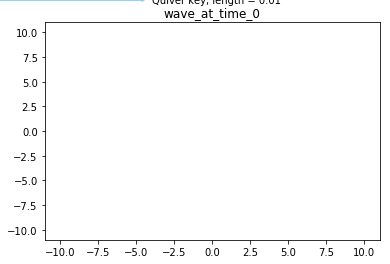

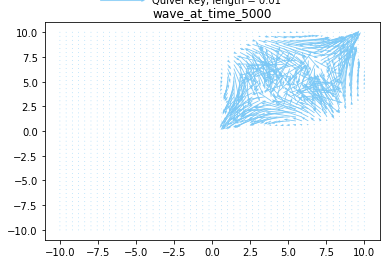

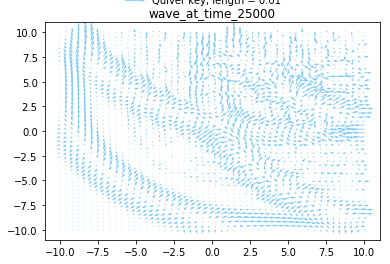

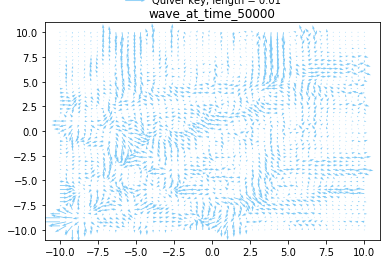

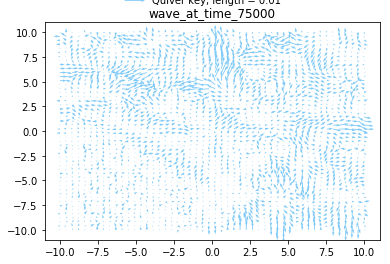

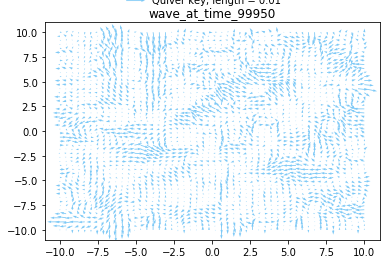

In [7]:
X = np.linspace(-10, 10, int(N/2))
Y = np.linspace(-10, 10, int(N/2))
X, Y = np.meshgrid(X, Y)

temp = [0, 100, 500, 1000, 1500, 1999]
for i in temp:
    fig, ax = plt.subplots()
    q = ax.quiver(X, Y, U[::2,::2,i], V[::2,::2,i],color = 'xkcd:lightblue')
    ax.quiverkey(q, X=0.3, Y=1.1, U=0.01,
                 label='Quiver key, length = 0.01', labelpos='E')
    ax.set_title('wave_at_time_{}'.format(i*50))
    plt.savefig('./pictures/wave_at_time_{}.png'.format(i*50))

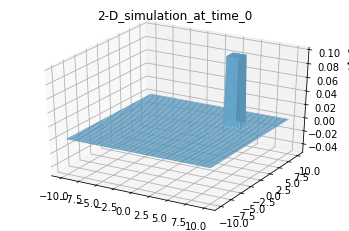

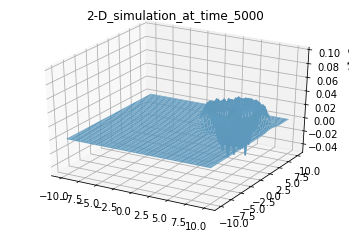

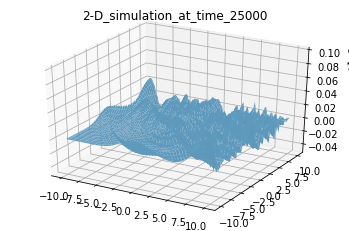

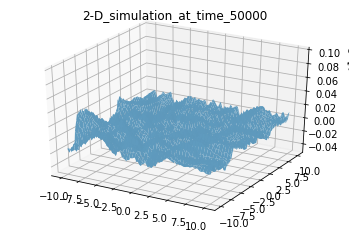

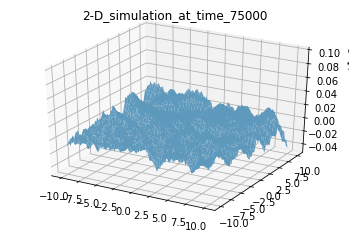

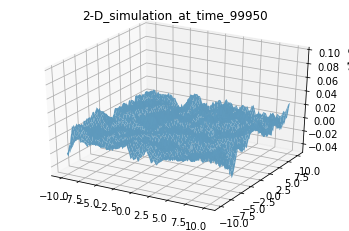

In [113]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

temp = [0, 100, 500, 1000, 1500, 1999]
for i in temp:
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.linspace(-10, 10, N)
    Y = np.linspace(-10, 10, N)
    X, Y = np.meshgrid(X, Y)
    # Plot the surface.
    ax.set_title('2-D_simulation_at_time_{}'.format(i*50))
    ax.set_zlim(99.95,100.1)
    surf = ax.plot_surface(X, Y, H[:,:,i],color = 'xkcd:lightblue')
    plt.savefig('./pictures/2-D_simulation_at_time_{}.png'.format(i*50))



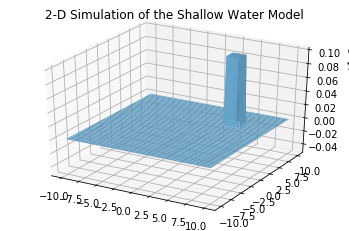

In [129]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('2-D Simulation of the Shallow Water Model')
# Make data.
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)
# Plot the surface.

surf = None
def animate(i):
    global surf
    # If a line collection is already remove it before drawing.
    if surf:
        ax.collections.remove(surf)
    surf = ax.plot_surface(X, Y, H[:,:,i*5],color = 'xkcd:lightblue')
    ax.set_zlim(99.95,100.1)
    
    return surf,


ani = animation.FuncAnimation(
    fig, animate, frames = 399,interval=30, blit=False)

HTML(ani.to_html5_video())

In [102]:
##### + horizontal advection + viscosity #####

In [55]:
# initialization
def initial_2d_v():
    X = 10**6
    Y = 10**6
    N = 100  # grid number in

    del_t = 50
    del_x = X/N
    del_y = Y/N
    T = 100000

    itr = int(T/del_t)

    f = 0.0001 # Coriolis force
    g = 9.8
    b = 1e-5
#     b = 0
    h = np.zeros((N,N,itr),dtype='float')

    h[:,:,0] = 100
    h[70:80,70:80,0] = 100.1
    H = np.mean(h[:,:,0])
    return H, N, del_t, del_x, del_y, itr, f, g, h, b

In [56]:
def leap_frog_central_scheme_3d_zeroboundary_advection(H, N, del_t, del_x, del_y, itr, f, g, h_, b):
    h = copy.deepcopy(h_)
    v = np.zeros((N,N,itr),dtype='float')
    u = np.zeros((N,N,itr),dtype='float')
    
    for t in range(1,itr):
        if t == 1 : # forward difference
            for i in range(N):
                for j in range(N):
                    if i == 0 and 0 < j < N-1: # boudary condition
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (- u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x)\
                                    - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x)\
                                    - v[i,j,t-1]*h_y - h[i,j,t-1]*v_y)*del_t\
                                    + h[i,j,t-1]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*h_y-b*v[i,j,t-1]-u[i,j,t-1]*(v[i+1,j,t-1]-v[i,j,t-1])/(del_x)-v[i,j,t-1]*v_y)*del_t + v[i,j,t-1]
                    elif j == N-1 and 0< i <N-1:
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h[i,j,t] = (-u[i,j,t-1]*h_x - h[i,j,t-1]*u_x - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*del_t + h[i,j,t-1]
                        u[i,j,t] = (f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*(u[i,j,t-1]-u[i,j-1,t-1])/(del_y))*del_t + u[i,j,t-1]
                        v[i,j,t] = 0
                    elif i == N-1 and 0< j <N-1:
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*h_y - h[i,j,t-1]*v_y)*del_t + h[i,j,t-1]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*h_y-b*v[i,j,t-1]-u[i,j,t-1]*(v[i,j,t-1]-v[i-1,j,t-1])/(del_x)-v[i,j,t-1]*v_y)*del_t + v[i,j,t-1]
                    elif j ==0 and 0< i < N-1:
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h[i,j,t] = (-u[i,j,t-1]*h_x - h[i,j,t-1]*u_x - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*del_t + h[i,j,t-1]
                        u[i,j,t] = (f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*(u[i,j+1,t-1]-u[i,j,t-1])/(del_y))*del_t + u[i,j,t-1]
                        v[i,j,t] = 0
                    elif (i==0 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*del_t + h[i,j,t-1]
                    elif (i==0 and j == N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*del_t + h[i,j,t-1]
                    elif (i==N-1 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*del_t + h[i,j,t-1]
                    elif (i ==N-1 and j==N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*del_t + h[i,j,t-1]
                    else:
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (-u[i,j,t-1]*h_x - h[i,j,t-1]*u_x - v[i,j,t-1]*h_y - h[i,j,t-1]*v_y)*del_t + h[i,j,t-1]
                        u[i,j,t] = (f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*u_y)*del_t + u[i,j,t-1]
                        v[i,j,t] = (-f*u[i,j,t-1]-g*h_y-b*v[i,j,t-1]-u[i,j,t-1]*v_x-v[i,j,t-1]*v_y)*del_t + v[i,j,t-1]

        else:
            for i in range(N):
                for j in range(N):
                    if i == 0 and 0 < j < N-1: # boudary condition
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (- u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) \
                                    - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x) \
                                    - v[i,j,t-1]*h_y \
                                    - h[i,j,t-1]*v_y)*2*del_t \
                                    + h[i,j,t-2]
                        u[i,j,t] = 0
                        v[i,j,t] = ( - f*u[i,j,t-1] - g*h_y - b*v[i,j,t-1] - u[i,j,t-1]*(v[i+1,j,t-1] - v[i,j,t-1])/(del_x) - v[i,j,t-1]*v_y)*del_t*2 + v[i,j,t-2]
                    elif j == N-1 and 0< i <N-1:
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h[i,j,t] = (- u[i,j,t-1]*h_x \
                                    - h[i,j,t-1]*u_x \
                                    - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) \
                                    - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*2*del_t \
                                    + h[i,j,t-2]
                        u[i,j,t] = (   f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*(u[i,j,t-1] - u[i,j-1,t-1])/(del_y))*2*del_t + u[i,j,t-2]
                        v[i,j,t] = 0
                    elif i == N-1 and 0< j <N-1:
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*h_y - h[i,j,t-1]*v_y)*2*del_t + h[i,j,t-2]
                        u[i,j,t] = 0
                        v[i,j,t] = (-f*u[i,j,t-1]-g*h_y-b*v[i,j,t-1]-u[i,j,t-1]*(v[i,j,t-1]-v[i-1,j,t-1])/(del_x)-v[i,j,t-1]*v_y)*del_t*2 + v[i,j,t-2]
                    elif j ==0 and 0< i < N-1:
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h[i,j,t] = (-u[i,j,t-1]*h_x - h[i,j,t-1]*u_x - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*2*del_t + h[i,j,t-2]
                        u[i,j,t] = (f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*(u[i,j+1,t-1]-u[i,j,t-1])/(del_y))*2*del_t + u[i,j,t-2]
                        v[i,j,t] = 0
                    elif (i==0 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*2*del_t + h[i,j,t-2]
                    elif (i==0 and j == N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i+1,j,t-1]-h[i,j,t-1])/(del_x) - h[i,j,t-1]*(u[i+1,j,t-1]-u[i,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*2*del_t + h[i,j,t-2]
                    elif (i==N-1 and j==0):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j+1,t-1]-h[i,j,t-1])/(del_y) - h[i,j,t-1]*(v[i,j+1,t-1]-v[i,j,t-1])/(del_y))*2*del_t + h[i,j,t-2]
                    elif (i ==N-1 and j==N-1):
                        u[i,j,t] = 0
                        v[i,j,t] = 0
                        h[i,j,t] = (-u[i,j,t-1]*(h[i,j,t-1]-h[i-1,j,t-1])/(del_x) - h[i,j,t-1]*(u[i,j,t-1]-u[i-1,j,t-1])/(del_x) - v[i,j,t-1]*(h[i,j,t-1]-h[i,j-1,t-1])/(del_y) - h[i,j,t-1]*(v[i,j,t-1]-v[i,j-1,t-1])/(del_y))*2*del_t + h[i,j,t-2]
                    else:
                        h_x = (h[i+1,j,t-1]-h[i-1,j,t-1])/(2*del_x)
                        h_y = (h[i,j+1,t-1]-h[i,j-1,t-1])/(2*del_y)
                        u_x = (u[i+1,j,t-1]-u[i-1,j,t-1])/(2*del_x)
                        u_y = (u[i,j+1,t-1]-u[i,j-1,t-1])/(2*del_y)
                        v_x = (v[i+1,j,t-1]-v[i-1,j,t-1])/(2*del_x)
                        v_y = (v[i,j+1,t-1]-v[i,j-1,t-1])/(2*del_y)
                        h[i,j,t] = (- u[i,j,t-1]*h_x - h[i,j,t-1]*u_x - v[i,j,t-1]*h_y - h[i,j,t-1]*v_y)*2*del_t + h[i,j,t-2]
                        u[i,j,t] = (  f*v[i,j,t-1] - g*h_x - b*u[i,j,t-1] - u[i,j,t-1]*u_x - v[i,j,t-1]*u_y)*2*del_t + u[i,j,t-2]
                        v[i,j,t] = (- f*u[i,j,t-1] - g*h_y - b*v[i,j,t-1] - u[i,j,t-1]*v_x - v[i,j,t-1]*v_y)*del_t*2 + v[i,j,t-2]

            if t%5 == 0: # smooth
                h[:,:,t-1] = h[:,:,t-1] + 0.01*(h[:,:,t]-2*h[:,:,t-1]+h[:,:,t-2])
                u[:,:,t-1] = u[:,:,t-1] + 0.01*(u[:,:,t]-2*u[:,:,t-1]+u[:,:,t-2])
                v[:,:,t-1] = v[:,:,t-1] + 0.01*(v[:,:,t]-2*v[:,:,t-1]+v[:,:,t-2])
            
    return u,v,h


In [57]:
H, N, del_t, del_x, del_y, itr, f, g, h, b = initial_2d_v()
U,V,H = leap_frog_central_scheme_3d_zeroboundary_advection(H, N, del_t, del_x, del_y, itr, f, g, h, b)

In [46]:
H, N, del_t, del_x, del_y, itr, f, g, h, b = initial_2d_v()
U_,V_,H_ = leap_frog_central_scheme_3d_zeroboundary_advection(H, N, del_t, del_x, del_y, itr, f, g, h, b)

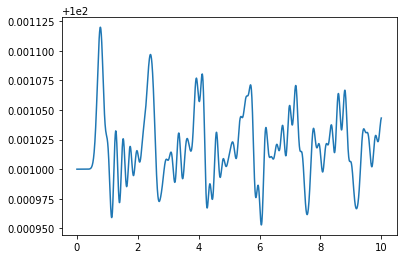

In [61]:
plt.plot(np.linspace(0,10,2000), np.mean(H,axis=(0,1)))

In [67]:
## calculate total energy
def total_energy(H,U,V):
    H2 = H**2
    K = np.sum(H*(U**2 + V**2)/2, axis = (0,1))
    P = np.sum(g*H2/2, axis = (0,1))- np.mean(H,axis=(0,1))**2*g/2*N*N
    return K,P

In [80]:
k_with_vis, p_with_vis = total_energy(H,U,V)

In [71]:
H.shape

(100, 100, 2000)

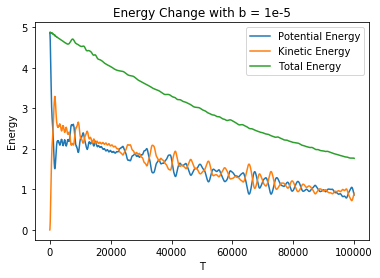

In [81]:
fig = plt.figure()
plt.plot(np.linspace(0,100000,2000),p_with_vis, label = 'Potential Energy')
plt.plot(np.linspace(0,100000,2000),k_with_vis, label='Kinetic Energy')
plt.plot(np.linspace(0,100000,2000),k_with_vis + p_with_vis, label='Total Energy')
plt.legend()
plt.xlabel('T')
plt.ylabel('Energy')
plt.title('Energy Change with b = 1e-5')
plt.savefig('./pictures/Energy_with_b=1e-5.png')

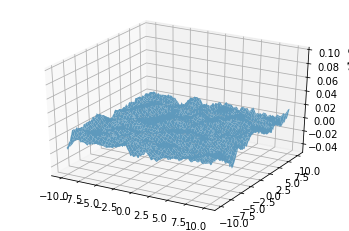

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)
# Plot the surface.

surf = ax.plot_surface(X, Y, H[:,:,-1],color = 'xkcd:lightblue')
ax.set_zlim(99.95,100.1)
plt.show()

/Users/zzou/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/zzou/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/zzou/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/Users/zzou/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


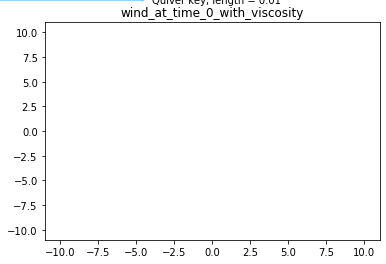

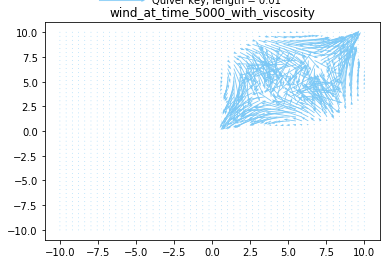

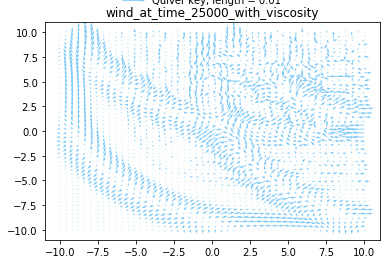

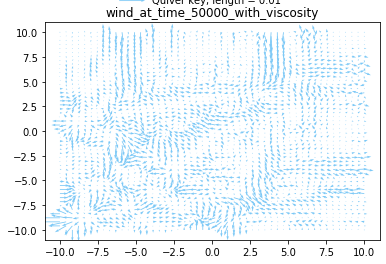

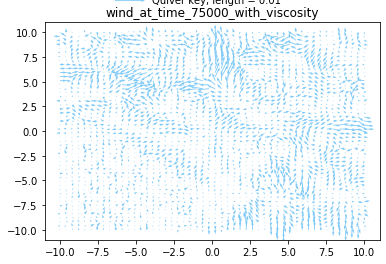

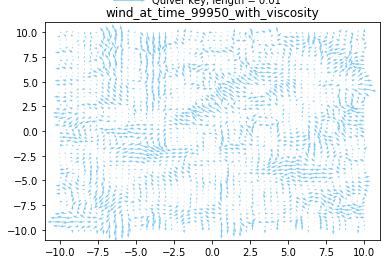

In [9]:
X = np.linspace(-10, 10, int(N/2))
Y = np.linspace(-10, 10, int(N/2))
X, Y = np.meshgrid(X, Y)

temp = [0, 100, 500, 1000, 1500, 1999]
for i in temp:
    fig, ax = plt.subplots()
    q = ax.quiver(X, Y, U[::2,::2,i], V[::2,::2,i],color = 'xkcd:lightblue')
    ax.quiverkey(q, X=0.3, Y=1.1, U=0.01,
                 label='Quiver key, length = 0.01', labelpos='E')
    ax.set_title('wind_at_time_{}_with_viscosity'.format(i*50))
    plt.savefig('./pictures/wind_at_time_{}_with_viscosity.png'.format(i*50))

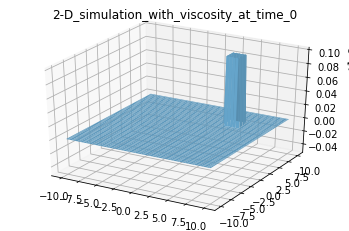

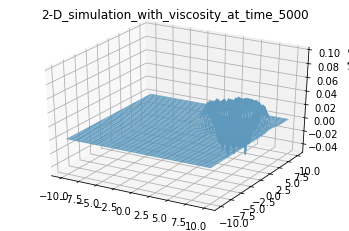

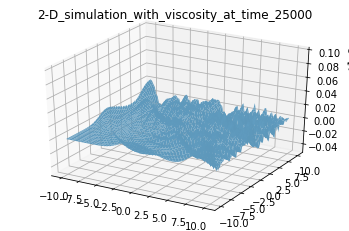

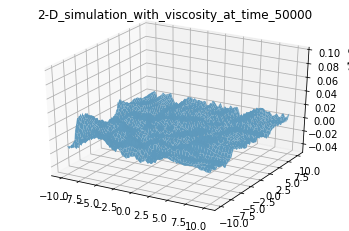

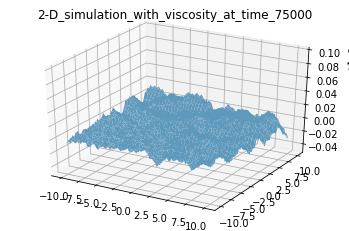

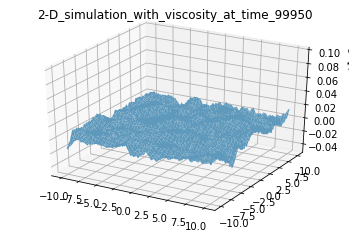

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

temp = [0, 100, 500, 1000, 1500, 1999]
for i in temp:
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Make data.
    X = np.linspace(-10, 10, N)
    Y = np.linspace(-10, 10, N)
    X, Y = np.meshgrid(X, Y)
    # Plot the surface.
    ax.set_title('2-D_simulation_with_viscosity_at_time_{}'.format(i*50))
    ax.set_zlim(99.95,100.1)
    surf = ax.plot_surface(X, Y, H[:,:,i],color = 'xkcd:lightblue')
    plt.savefig('./pictures/2-D_simulation_with_viscosity_at_time_{}.png'.format(i*50))



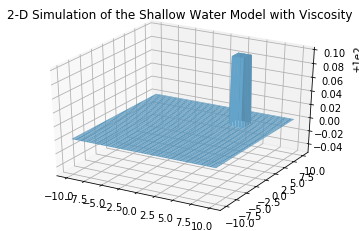

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_title('2-D Simulation of the Shallow Water Model with Viscosity')
# Make data.
X = np.linspace(-10, 10, N)
Y = np.linspace(-10, 10, N)
X, Y = np.meshgrid(X, Y)
# Plot the surface.

surf = None
def animate(i):
    global surf
    # If a line collection is already remove it before drawing.
    if surf:
        ax.collections.remove(surf)
    surf = ax.plot_surface(X, Y, H[:,:,i*5],color = 'xkcd:lightblue')
    ax.set_zlim(99.95,100.1)
    
    return surf,


ani = animation.FuncAnimation(
    fig, animate, frames = 399,interval=30, blit=False)

HTML(ani.to_html5_video())